In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import cross_validation, metrics
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Reference
# https://www.cnblogs.com/pinard/p/6160412.html

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# reading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# preparing data
y_train = train["label"]
x_train = train.iloc[:,1:]
x_train = x_train / 255.0  # data range [0, 1]
x_test = test / 255.0      # data range [0, 1]
#x_train = x_train.values.reshape(-1,28,28,1)   # input image dimensions: 28*28*1
#x_test = x_test.values.reshape(-1,28,28,1)
#y_train = keras.utils.to_categorical(y_train, num_classes = 10)  # convert a class vector (integers) to binary class matrix
print('training data shape', x_train.shape)
print('testing data shape', x_test.shape)
print('training result shape', y_train.shape)
print('training result example', y_train[0])

training data shape (42000, 784)
testing data shape (28000, 784)
training result shape (42000,)
training result example 1


In [6]:
# preparing training and testing data for model validation
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1)

# Random forest classifier

In [7]:
# build random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, oob_score = True,
                             min_samples_split=100, min_samples_leaf=20, max_features='sqrt',
                              random_state=0, criterion = 'entropy', n_jobs=-1)
clf.fit(X_train, Y_train)
#print(clf.feature_importances_)
print("accuracy on training set: %f" % clf.score(X_train, Y_train))
print("accuracy on test set: %f" % clf.score(X_val, Y_val))
print("out-of-bag estimate: %f" % clf.oob_score_)

accuracy on training set: 0.943175
accuracy on test set: 0.927143
out-of-bag estimate: 0.927222


In [18]:
# build random forest classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, oob_score = True,
                             #min_samples_split=100, min_samples_leaf=20, max_features='sqrt',
                              random_state=0, criterion = 'entropy', n_jobs=-1)
clf.fit(X_train, Y_train)
print("accuracy on training set: %f" % clf.score(X_train, Y_train))
print("accuracy on test set: %f" % clf.score(X_val, Y_val))
print("out-of-bag estimate: %f" % clf.oob_score_)

accuracy on training set: 0.976746
accuracy on test set: 0.946190
out-of-bag estimate: 0.948889


In [9]:
# GridSearch for n_estimators
param_test1 = {'n_estimators':range(50,650,100)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(max_depth=10, oob_score = True, 
                                  min_samples_split=100,min_samples_leaf=20,max_features='sqrt', random_state=0), 
                                  param_grid = param_test1,cv=3, n_jobs=-1, verbose=1)
gsearch1.fit(X_train, Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 10.0min finished


finish


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.92050, std: 0.00246, params: {'n_estimators': 50},
  mean: 0.92513, std: 0.00178, params: {'n_estimators': 150},
  mean: 0.92611, std: 0.00282, params: {'n_estimators': 250},
  mean: 0.92646, std: 0.00221, params: {'n_estimators': 350},
  mean: 0.92646, std: 0.00234, params: {'n_estimators': 450},
  mean: 0.92698, std: 0.00230, params: {'n_estimators': 550}],
 {'n_estimators': 550},
 0.926984126984127)

In [10]:
# GridSearch for max_depth and min_samples_split
param_test2 = {'max_depth':range(5,21,5), 'min_samples_split':range(50,201,50)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 500, oob_score = True, 
                                  min_samples_leaf=20, max_features='sqrt', random_state=0), 
                                  param_grid = param_test2,cv=3, n_jobs=-1, verbose=1)

gsearch2.fit(X_train, Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 31.2min finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.86249, std: 0.00355, params: {'max_depth': 5, 'min_samples_split': 50},
  mean: 0.86272, std: 0.00309, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: 0.86265, std: 0.00350, params: {'max_depth': 5, 'min_samples_split': 150},
  mean: 0.86161, std: 0.00287, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.93257, std: 0.00223, params: {'max_depth': 10, 'min_samples_split': 50},
  mean: 0.92672, std: 0.00242, params: {'max_depth': 10, 'min_samples_split': 100},
  mean: 0.92111, std: 0.00247, params: {'max_depth': 10, 'min_samples_split': 150},
  mean: 0.91563, std: 0.00235, params: {'max_depth': 10, 'min_samples_split': 200},
  mean: 0.93780, std: 0.00178, params: {'max_depth': 15, 'min_samples_split': 50},
  mean: 0.93058, std: 0.00230, params: {'max_depth': 15, 'min_samples_split': 100},
  mean: 0.92429, std: 0.00225, params: {'max_depth': 15, 'min_samples_split': 150},
  mean: 0.91870, std: 0.00169, params: {'max_depth': 15, 'min_samples_split': 200},

In [14]:
# GridSearch for min_samples_leaf and min_samples_split
param_test3 = {'min_samples_split':range(30,71,10), 'min_samples_leaf':range(10,51,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 500, oob_score = True, 
                                  max_depth=20, 
                                  max_features='sqrt', random_state=0), 
                                  param_grid = param_test3,cv=3, n_jobs=-1, verbose=1)

gsearch3.fit(X_train, Y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 45.6min finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.94659, std: 0.00146, params: {'min_samples_leaf': 10, 'min_samples_split': 30},
  mean: 0.94516, std: 0.00202, params: {'min_samples_leaf': 10, 'min_samples_split': 40},
  mean: 0.94315, std: 0.00167, params: {'min_samples_leaf': 10, 'min_samples_split': 50},
  mean: 0.94087, std: 0.00146, params: {'min_samples_leaf': 10, 'min_samples_split': 60},
  mean: 0.93921, std: 0.00168, params: {'min_samples_leaf': 10, 'min_samples_split': 70},
  mean: 0.94003, std: 0.00169, params: {'min_samples_leaf': 20, 'min_samples_split': 30},
  mean: 0.94003, std: 0.00169, params: {'min_samples_leaf': 20, 'min_samples_split': 40},
  mean: 0.93820, std: 0.00178, params: {'min_samples_leaf': 20, 'min_samples_split': 50},
  mean: 0.93664, std: 0.00273, params: {'min_samples_leaf': 20, 'min_samples_split': 60},
  mean: 0.93505, std: 0.00204, params: {'min_samples_leaf': 20, 'min_samples_split': 70},
  mean: 0.93280, std: 0.00265, params: {'min_samples_leaf': 30, 'min_samples_split': 30},
  mean: 0.

In [24]:
# GridSearch for min_samples_leaf and min_samples_split
param_test4 = {'min_samples_split':range(2,31,5), 'min_samples_leaf':range(1,21,5)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 500, oob_score = True, 
                                  max_depth=20, 
                                  max_features='sqrt', random_state=0), 
                                  param_grid = param_test4, cv=3, n_jobs=-1, verbose=1)

gsearch4.fit(X_train, Y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 69.3min finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.96246, std: 0.00199, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.96026, std: 0.00195, params: {'min_samples_leaf': 1, 'min_samples_split': 7},
  mean: 0.95828, std: 0.00178, params: {'min_samples_leaf': 1, 'min_samples_split': 12},
  mean: 0.95606, std: 0.00207, params: {'min_samples_leaf': 1, 'min_samples_split': 17},
  mean: 0.95460, std: 0.00216, params: {'min_samples_leaf': 1, 'min_samples_split': 22},
  mean: 0.95304, std: 0.00217, params: {'min_samples_leaf': 1, 'min_samples_split': 27},
  mean: 0.95347, std: 0.00206, params: {'min_samples_leaf': 6, 'min_samples_split': 2},
  mean: 0.95347, std: 0.00206, params: {'min_samples_leaf': 6, 'min_samples_split': 7},
  mean: 0.95347, std: 0.00206, params: {'min_samples_leaf': 6, 'min_samples_split': 12},
  mean: 0.95198, std: 0.00219, params: {'min_samples_leaf': 6, 'min_samples_split': 17},
  mean: 0.95103, std: 0.00199, params: {'min_samples_leaf': 6, 'min_samples_split': 22},
  mean: 0.95011, std: 0.0

In [25]:
# GridSearch for max_features
param_test5 = {'max_features':['auto','sqrt','log2']}
gsearch5 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 500, oob_score = True, 
                                  max_depth=20, min_samples_split=2,min_samples_leaf=1,
                                  random_state=0), 
                                  param_grid = param_test5, cv=3, n_jobs=-1, verbose=1)
gsearch5.fit(X_train, Y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  9.1min finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.96246, std: 0.00199, params: {'max_features': 'auto'},
  mean: 0.96246, std: 0.00199, params: {'max_features': 'sqrt'},
  mean: 0.96114, std: 0.00236, params: {'max_features': 'log2'}],
 {'max_features': 'auto'},
 0.9624603174603175)

In [7]:
# train the model using best parameters
clf_RF = RandomForestClassifier(n_estimators= 500, oob_score = True, 
                                  max_depth=20, min_samples_split=2,min_samples_leaf=1,
                                  max_features='auto', random_state=0)
clf_RF.fit(X_train, Y_train)
print("accuracy on training set: %f" % clf_RF.score(X_train, Y_train))
print("accuracy on test set: %f" % clf_RF.score(X_val, Y_val))
print("out-of-bag estimate: %f" % clf_RF.oob_score_)

accuracy on training set: 0.999630
accuracy on test set: 0.970714
out-of-bag estimate: 0.965291


In [11]:
# visualizing confusion matrix 
Y_pred = clf_RF.predict(X_val)
cm = confusion_matrix(Y_val, Y_pred)
print(cm)

[[391   0   0   0   0   1   1   1   1   0]
 [  0 453   2   1   0   0   1   0   0   0]
 [  1   1 422   1   1   0   2   2   2   0]
 [  2   1   7 438   0   3   0   2   3   0]
 [  1   1   0   0 360   0   2   0   0   7]
 [  0   0   0   6   0 367   3   1   1   3]
 [  1   1   1   0   0   4 388   0   1   0]
 [  0   1   4   0   0   0   0 426   2   4]
 [  0   3   3   4   2   7   1   1 402   6]
 [  3   0   2   2   7   0   0   2   3 427]]


In [14]:
print('Precision Score:',precision_score(Y_val, Y_pred, average='weighted'))
print('Recall Score:',recall_score(Y_val, Y_pred,average='weighted'))
print('F1 Score:',f1_score(Y_val, Y_pred,average='weighted'))


Precision Score: 0.9700097087051768
Recall Score: 0.97
F1 Score: 0.9699595289366851


In [30]:
# model prediction 
y_test = clf_RF.predict(x_test)

In [31]:
# write results to csv file
results = pd.Series(y_test,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("RF_results.csv",index=False)

# KNN classifer

In [8]:
#tune the parameter n_neighbors
scores = []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred_knn = knn.predict(X_val)
    scores.append(accuracy_score(Y_val,y_pred_knn)) 

Text(0, 0.5, 'Accuracy on Validation Data')

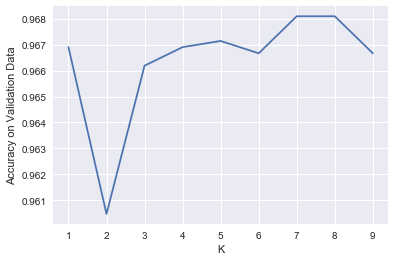

In [9]:
plt.plot(range(1,10),scores)
plt.xlabel('K')
plt.ylabel('Accuracy on Validation Data')

In [9]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_val)
accuracy = (y_pred_knn == Y_val).mean()
accuracy

0.9697619047619047

In [10]:
#print(clf.feature_importances_)
print("accuracy on training set: %f" % knn.score(X_train, Y_train))
print("accuracy on test set: %f" % knn.score(X_val, Y_val))

accuracy on training set: 0.975212
accuracy on test set: 0.969762


In [13]:
print('Precision Score:',precision_score(Y_val, y_pred_knn, average='weighted'))
print('Recall Score:',recall_score(Y_val, y_pred_knn,average='weighted'))
print('F1 Score:',f1_score(Y_val, y_pred_knn,average='weighted'))

Precision Score: 0.9700873071931736
Recall Score: 0.9697619047619047
F1 Score: 0.9696883775466085


In [15]:
# k-fold, n_neighbors=7 is taken according to the plot above
clf_knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(clf_knn, x_train, y_train, cv=5)
scores.mean()

0.9647619584646627

In [16]:
# visualizing confusion matrix 
cm = confusion_matrix(Y_val, y_pred_knn)
print(cm)

[[430   0   0   0   0   0   2   0   0   1]
 [  0 467   1   0   0   0   0   2   0   0]
 [  5   4 402   1   1   1   0   6   1   0]
 [  0   2   2 402   0   3   0   3   2   1]
 [  0   6   0   0 376   0   1   1   0   7]
 [  2   0   0   4   2 366   3   0   1   1]
 [  3   1   0   0   0   1 397   0   0   0]
 [  0   9   1   0   1   0   0 438   0   5]
 [  1   6   0   6   1   6   2   0 385   6]
 [  1   2   1   1   5   0   1  13   1 397]]


In [17]:
# model prediction 
y_test = knn.predict(x_test)

In [18]:
# write results to csv file
results = pd.Series(y_test,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("KNN_results.csv",index=False)